In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data1=pd.read_csv("date-hour-soo-dest-2016.csv")
data1

,Origin,Destination,Throughput,DateTime
0,12TH,12TH,1.0,2016-01-01 00:00:00
1,12TH,16TH,1.0,2016-01-01 00:00:00
2,12TH,24TH,4.0,2016-01-01 00:00:00
3,12TH,ASHB,4.0,2016-01-01 00:00:00
4,12TH,BALB,2.0,2016-01-01 00:00:00
...,...,...,...,...
9581966,SANL,SHAY,3.0,2016-12-16 18:00:00
9581967,SANL,UCTY,9.0,2016-12-16 18:00:00
9581968,SANL,WCRK,3.0,2016-12-16 18:00:00
9581969,SANL,WOAK,2.0,2016-12-16 18:00:00


In [3]:
data2=pd.read_csv("date-hour-soo-dest-2017.csv")
data2

,Origin,Destination,Throughput,DateTime
0,12TH,19TH,1,2017-01-01 00:00:00
1,12TH,24TH,2,2017-01-01 00:00:00
2,12TH,BAYF,1,2017-01-01 00:00:00
3,12TH,CIVC,5,2017-01-01 00:00:00
4,12TH,COLS,2,2017-01-01 00:00:00
...,...,...,...,...
3313620,WSPR,MONT,1,2017-05-03 23:00:00
3313621,WSPR,NBRK,1,2017-05-03 23:00:00
3313622,WSPR,NCON,1,2017-05-03 23:00:00
3313623,WSPR,SANL,2,2017-05-03 23:00:00


In [4]:
df = data1.append(data2)
df

,Origin,Destination,Throughput,DateTime
0,12TH,12TH,1.0,2016-01-01 00:00:00
1,12TH,16TH,1.0,2016-01-01 00:00:00
2,12TH,24TH,4.0,2016-01-01 00:00:00
3,12TH,ASHB,4.0,2016-01-01 00:00:00
4,12TH,BALB,2.0,2016-01-01 00:00:00
...,...,...,...,...
3313620,WSPR,MONT,1.0,2017-05-03 23:00:00
3313621,WSPR,NBRK,1.0,2017-05-03 23:00:00
3313622,WSPR,NCON,1.0,2017-05-03 23:00:00
3313623,WSPR,SANL,2.0,2017-05-03 23:00:00


In [5]:
df.isnull().sum()

Origin         0
Destination    1
Throughput     1
DateTime       1
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12895596 entries, 0 to 3313624
Data columns (total 4 columns):
 #   Column       Dtype  
---  ------       -----  
 0   Origin       object 
 1   Destination  object 
 2   Throughput   float64
 3   DateTime     object 
dtypes: float64(1), object(3)
memory usage: 491.9+ MB


In [7]:
df['Date']=pd.to_datetime(df['DateTime'])

df['Year']=df['Date'].dt.year
df['Month']=df['Date'].dt.month
df['Hour']=df['Date'].dt.hour
df['Weekday']=df['Date'].dt.dayofweek
df['Month_Name']=df['Date'].dt.month_name()
df['Weekday_Name']=df['Date'].dt.day_name()

df.drop("DateTime",axis=1,inplace=True)
df.head()

,Origin,Destination,Throughput,Date,Year,Month,Hour,Weekday,Month_Name,Weekday_Name
0,12TH,12TH,1.0,2016-01-01,2016.0,1.0,0.0,4.0,January,Friday
1,12TH,16TH,1.0,2016-01-01,2016.0,1.0,0.0,4.0,January,Friday
2,12TH,24TH,4.0,2016-01-01,2016.0,1.0,0.0,4.0,January,Friday
3,12TH,ASHB,4.0,2016-01-01,2016.0,1.0,0.0,4.0,January,Friday
4,12TH,BALB,2.0,2016-01-01,2016.0,1.0,0.0,4.0,January,Friday


In [8]:
# Which bart station is the busiest?

In [9]:
df3 = pd.DataFrame()

In [10]:
df['StationBusiest']=df['Origin'] + df['Destination']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


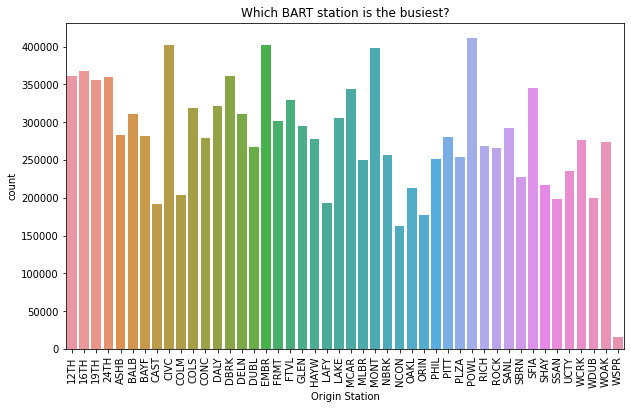

In [11]:
fig=plt.figure(figsize=(10,6))
ax=sns.countplot(df['Origin'],)
ax.set_title('Which BART station is the busiest?')
ax.set_xlabel('Origin Station')
plt.xticks(rotation=90);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


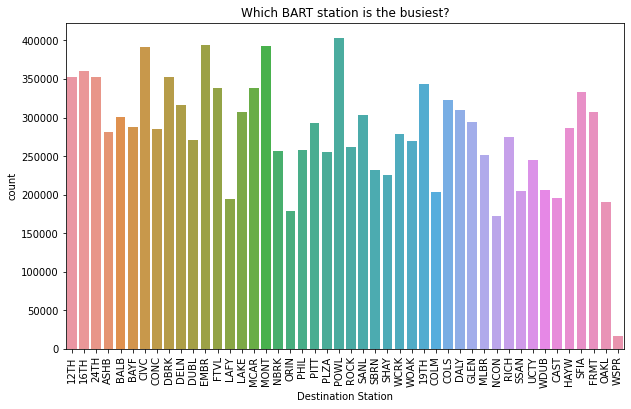

In [12]:
fig=plt.figure(figsize=(10,6))
ax=sns.countplot(df['Destination'],)
ax.set_title('Which BART station is the busiest?')
ax.set_xlabel('Destination Station')
plt.xticks(rotation=90);

In [13]:
# What is the least popular bart route?

In [14]:
df3['Total Trip'] = df.groupby('StationBusiest')['Throughput'].sum().sort_values(ascending=False)
df3['Total Trip']

StationBusiest
POWLBALB    1073139.0
BALBMONT     991952.0
BALBPOWL     911027.0
POWL24TH     884502.0
24THMONT     882508.0
              ...    
MLBRWSPR         45.0
SBRNWSPR         43.0
WSPRMLBR         42.0
SSANWSPR         41.0
WSPRSBRN         40.0
Name: Total Trip, Length: 2116, dtype: float64

In [15]:
# When is the best time to go to SF from berkeley if you want to find a seat?

In [16]:
df['Origin'].unique()

array(['12TH', '16TH', '19TH', '24TH', 'ASHB', 'BALB', 'BAYF', 'CAST',
       'CIVC', 'COLM', 'COLS', 'CONC', 'DALY', 'DBRK', 'DELN', 'DUBL',
       'EMBR', 'FRMT', 'FTVL', 'GLEN', 'HAYW', 'LAFY', 'LAKE', 'MCAR',
       'MLBR', 'MONT', 'NBRK', 'NCON', 'OAKL', 'ORIN', 'PHIL', 'PITT',
       'PLZA', 'POWL', 'RICH', 'ROCK', 'SANL', 'SBRN', 'SFIA', 'SHAY',
       'SSAN', 'UCTY', 'WCRK', 'WDUB', 'WOAK', 'WSPR'], dtype=object)

In [17]:
df['Destination'].unique()

array(['12TH', '16TH', '24TH', 'ASHB', 'BALB', 'BAYF', 'CIVC', 'CONC',
       'DBRK', 'DELN', 'DUBL', 'EMBR', 'FTVL', 'LAFY', 'LAKE', 'MCAR',
       'MONT', 'NBRK', 'ORIN', 'PHIL', 'PITT', 'PLZA', 'POWL', 'ROCK',
       'SANL', 'SBRN', 'SHAY', 'WCRK', 'WOAK', '19TH', 'COLM', 'COLS',
       'DALY', 'GLEN', 'MLBR', 'NCON', 'RICH', 'SSAN', 'UCTY', 'WDUB',
       'CAST', 'HAYW', 'SFIA', 'FRMT', 'OAKL', 'WSPR', nan], dtype=object)

In [18]:
berkley_to_sf=df[(df['Origin']=='DBRK') & (df['Destination']=='SSAN')]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


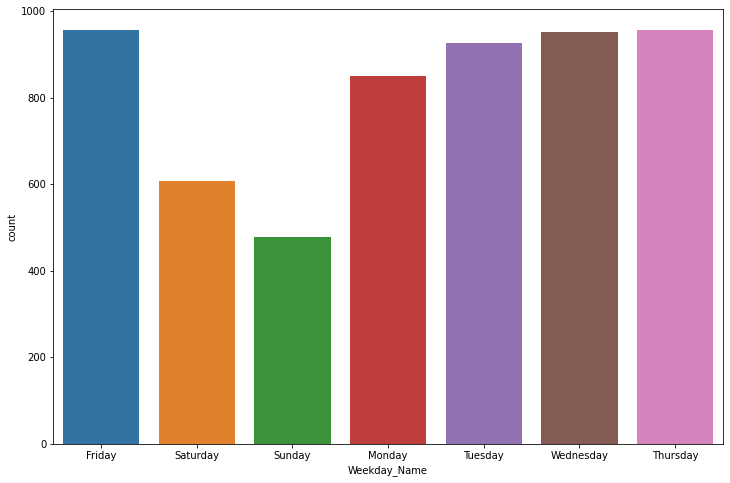

In [19]:
berkley_to_sf.groupby('Weekday').count()['Throughput'].sort_values(ascending=False)
plt.figure(figsize=(12,8))
sns.countplot(berkley_to_sf['Weekday_Name'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


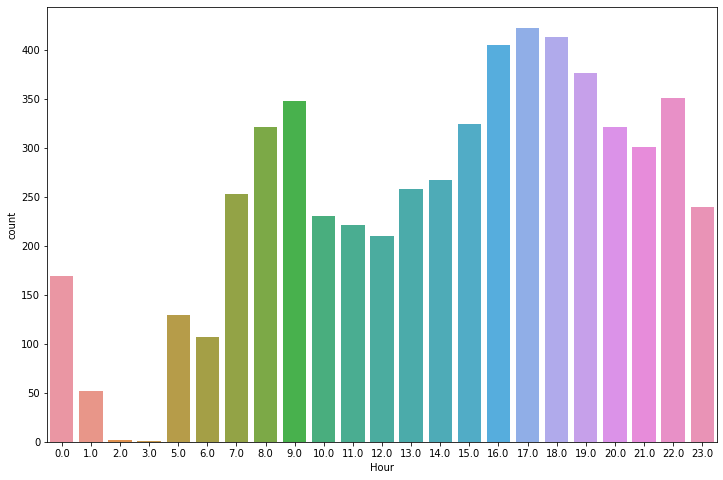

In [20]:
berkley_to_sf.groupby('Hour').count()['Throughput'].sort_values(ascending=False)
plt.figure(figsize=(12,8))
sns.countplot(berkley_to_sf['Hour'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


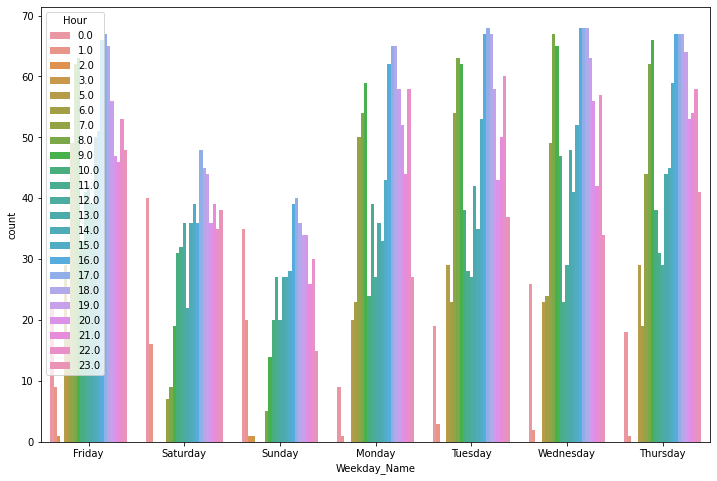

In [21]:
plt.figure(figsize=(12,8))
sns.countplot(berkley_to_sf['Weekday_Name'],hue=berkley_to_sf['Hour'])

In [22]:
# How many people take the BART late at night?

In [23]:
df[(df['Hour']>0) & (df['Hour']<6)]['Throughput'].sum()

2324404.0

In [24]:
 #Question A: Compute the straight line distance between every station

In [25]:
!pip install haversine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [26]:
import haversine as hs# BUURAYA BAK

In [27]:
stations=pd.read_csv("station_info.csv",delimiter=',', low_memory=False)
stations.sample(5)

,Abbreviation,Description,Location,Name
13,DBRK,"2160 Shattuck Avenue, Berkeley CA 94704<br />T...","-122.268133,37.870104,0",Downtown Berkeley (DBRK)
2,19TH,"1900 Broadway, Oakland CA 94612<br />19th Stre...","-122.268602,37.808350,0",19th St. Oakland (19TH)
12,DALY,"500 John Daly Blvd., Daly City CA 94014<br />D...","-122.469081,37.706121,0",Daly City (DALY)
21,LAFY,"3601 Deer Hill Road, Lafayette CA 94549<br />C...","-122.124630,37.893176,0",Lafayette (LAFY)
29,ORIN,"11 Camino Pablo, Orinda CA 94563<br />Original...","-122.183791,37.878361,0",Orinda (ORIN)


In [33]:
stations['longitude'] = stations.Location.apply(lambda x: float(x.split(',')[0]))
stations['latitude'] = stations.Location.apply(lambda x: float(x.split(',')[1]))

In [34]:
stationsA=stations[["Abbreviation","latitude","longitude"]]
stationsB=stations[["Abbreviation","latitude","longitude"]]

In [35]:
stationsA[["longitude","latitude"]]=stationsA[["longitude","latitude"]].astype("float")
stationsB[["longitude","latitude"]]=stationsB[["longitude","latitude"]].astype("float")

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [36]:
stationsA[['lat_radians_A','long_radians_A']] = np.radians(stationsA[['latitude','longitude']])
stationsB[['lat_radians_B','long_radians_B']] = np.radians(stationsB[['latitude','longitude']])

In [38]:
import sklearn
from sklearn import neighbors

dist = sklearn.neighbors.DistanceMetric.get_metric('haversine')
dist_matrix = (dist.pairwise(stationsA[['lat_radians_A','long_radians_A']],stationsB[['lat_radians_B','long_radians_B']])*6371) # 6371 is the radius of the earth in kilometers
df_dist_matrix = (pd.DataFrame(dist_matrix,index=stationsA['Abbreviation'], columns=stationsB['Abbreviation']))

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_distance_metric.py:14: FutureWarning: sklearn.neighbors.DistanceMetric has been moved to sklearn.metrics.DistanceMetric in 1.0. This import path will be removed in 1.3
  category=FutureWarning,


In [39]:
df_dist_matrix

Abbreviation,12TH,16TH,19TH,24TH,ASHB,BALB,BAYF,CAST,CIVC,COLS,...,SANL,SBRN,SFIA,SHAY,SSAN,UCTY,WARM,WCRK,WDUB,WOAK
Abbreviation,,,,,,,,,,,,,,,,,,,,,
12TH,0.000000,13.720175,0.567617,14.097927,5.453806,17.972899,17.421986,21.318066,12.818548,8.602724,...,13.315746,22.428251,23.437267,26.644817,21.698728,32.578345,44.493097,21.179219,32.315075,2.084928
16TH,13.720175,0.000000,14.123076,1.406790,16.370223,5.417745,26.873362,31.369785,1.703137,19.629420,...,23.259691,14.158399,16.751655,35.047867,11.411739,40.370112,51.419301,34.647001,43.824988,11.806930
19TH,0.567617,14.123076,0.000000,14.537177,4.944611,18.449743,17.594397,21.423040,13.176704,8.759155,...,13.491787,22.989786,24.004818,26.832791,22.238484,32.780913,44.714838,20.697326,32.267711,2.363310
24TH,14.097927,1.406790,14.537177,0.000000,17.138578,4.296647,26.382151,30.899845,3.051922,19.454198,...,22.878946,12.756104,15.346553,34.367219,10.069632,39.597423,50.525350,35.183337,43.483323,12.280671
ASHB,5.453806,16.370223,4.944611,17.138578,0.000000,21.355016,21.438504,24.836544,15.038489,12.762538,...,17.430801,27.148960,28.448090,30.663606,25.948183,36.657191,48.655719,18.717531,34.527755,5.766857
BALB,17.972899,5.417745,18.449743,4.296647,21.355016,0.000000,28.370186,32.896601,7.100637,22.326582,...,25.213150,9.717283,12.706137,35.692841,6.383547,40.567612,50.980852,39.147064,45.742854,16.283721
BAYF,17.421986,26.873362,17.594397,26.382151,21.438504,28.370186,0.000000,4.531980,26.914792,8.836838,...,4.106354,26.340207,25.078559,9.252500,28.171545,15.232015,27.220506,23.766972,17.447384,19.075498
CAST,21.318066,31.369785,21.423040,30.899845,24.836544,32.896601,4.531980,0.000000,31.370282,12.755491,...,8.262625,30.561191,29.103355,6.474328,32.551621,12.255757,24.163189,23.892538,13.004394,23.100389
CIVC,12.818548,1.703137,13.176704,3.051922,15.038489,7.100637,26.914792,31.370282,0.000000,19.315585,...,23.176677,15.787603,18.309889,35.315771,13.106973,40.754963,51.965033,33.495000,43.640710,10.822348


In [40]:
#Build a model that can predicted the number of people commuting to work by Bart between any 2 stations.

In [41]:
df_new = df[df.Weekday<=4] 

In [43]:
df_new

,Origin,Destination,Throughput,Date,Year,Month,Hour,Weekday,Month_Name,Weekday_Name,StationBusiest
0,12TH,12TH,1.0,2016-01-01 00:00:00,2016.0,1.0,0.0,4.0,January,Friday,12TH12TH
1,12TH,16TH,1.0,2016-01-01 00:00:00,2016.0,1.0,0.0,4.0,January,Friday,12TH16TH
2,12TH,24TH,4.0,2016-01-01 00:00:00,2016.0,1.0,0.0,4.0,January,Friday,12TH24TH
3,12TH,ASHB,4.0,2016-01-01 00:00:00,2016.0,1.0,0.0,4.0,January,Friday,12THASHB
4,12TH,BALB,2.0,2016-01-01 00:00:00,2016.0,1.0,0.0,4.0,January,Friday,12THBALB
...,...,...,...,...,...,...,...,...,...,...,...
3313620,WSPR,MONT,1.0,2017-05-03 23:00:00,2017.0,5.0,23.0,2.0,May,Wednesday,WSPRMONT
3313621,WSPR,NBRK,1.0,2017-05-03 23:00:00,2017.0,5.0,23.0,2.0,May,Wednesday,WSPRNBRK
3313622,WSPR,NCON,1.0,2017-05-03 23:00:00,2017.0,5.0,23.0,2.0,May,Wednesday,WSPRNCON
3313623,WSPR,SANL,2.0,2017-05-03 23:00:00,2017.0,5.0,23.0,2.0,May,Wednesday,WSPRSANL


In [44]:
df_new['mean_Throughput'] = df_new.groupby(['StationBusiest', 'Hour'])['Throughput'].transform('mean') # Her rotanin saat basi ortalama yolcu sayisi

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [45]:
df_new['work'] = df_new['mean_Throughput'] - df_new['Throughput']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [46]:
df_new[(df_new.Hour==8) | (df_new.Hour==17)]

,Origin,Destination,Throughput,Date,Year,Month,Hour,Weekday,Month_Name,Weekday_Name,StationBusiest,mean_Throughput,work
3068,12TH,16TH,1.0,2016-01-01 08:00:00,2016.0,1.0,8.0,4.0,January,Friday,12TH16TH,29.690265,28.690265
3069,12TH,19TH,1.0,2016-01-01 08:00:00,2016.0,1.0,8.0,4.0,January,Friday,12TH19TH,5.192771,4.192771
3070,12TH,24TH,1.0,2016-01-01 08:00:00,2016.0,1.0,8.0,4.0,January,Friday,12TH24TH,12.559524,11.559524
3071,12TH,ASHB,1.0,2016-01-01 08:00:00,2016.0,1.0,8.0,4.0,January,Friday,12THASHB,8.309309,7.309309
3072,12TH,BALB,2.0,2016-01-01 08:00:00,2016.0,1.0,8.0,4.0,January,Friday,12THBALB,6.618619,4.618619
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3305086,WSPR,SHAY,10.0,2017-05-03 17:00:00,2017.0,5.0,17.0,2.0,May,Wednesday,WSPRSHAY,4.740741,-5.259259
3305087,WSPR,UCTY,14.0,2017-05-03 17:00:00,2017.0,5.0,17.0,2.0,May,Wednesday,WSPRUCTY,7.607143,-6.392857
3305088,WSPR,WCRK,1.0,2017-05-03 17:00:00,2017.0,5.0,17.0,2.0,May,Wednesday,WSPRWCRK,1.181818,0.181818
3305089,WSPR,WDUB,1.0,2017-05-03 17:00:00,2017.0,5.0,17.0,2.0,May,Wednesday,WSPRWDUB,1.357143,0.357143
